Dropping the location column in because it is redundant for our purposes.

In [ ]:
# Lets get some import statements for the needed libraries.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
motor_c=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataMining/Motor_Vehicle_Collisions_-_Crashes.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
motor_c.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LATITUDE,1632595.0,4.067141e+01,1.467669e+00,0.00000,4.066842e+01,4.072165e+01,4.076911e+01,4.334444e+01
LONGITUDE,1632595.0,-7.383234e+01,2.855842e+00,-201.35999,-7.397552e+01,-7.392796e+01,-7.386668e+01,0.000000e+00
NUMBER OF PERSONS INJURED,1848281.0,2.827065e-01,6.763134e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.300000e+01
NUMBER OF PERSONS KILLED,1848268.0,1.324483e-03,3.839561e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
NUMBER OF PEDESTRIANS INJURED,1848299.0,5.220043e-02,2.348311e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01
NUMBER OF PEDESTRIANS KILLED,1848299.0,6.827900e-04,2.665442e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
NUMBER OF CYCLIST INJURED,1848299.0,2.403183e-02,1.548869e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
NUMBER OF CYCLIST KILLED,1848299.0,9.955099e-05,1.003111e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
NUMBER OF MOTORIST INJURED,1848299.0,2.052357e-01,6.380080e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,4.300000e+01
NUMBER OF MOTORIST KILLED,1848299.0,5.345455e-04,2.519709e-02,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


In [ ]:
#Looking for null values
motor_c.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           571200
ZIP CODE                          571422
LATITUDE                          215704
LONGITUDE                         215704
LOCATION                          215704
ON STREET NAME                    378234
CROSS STREET NAME                 665839
OFF STREET NAME                  1562434
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       5355
CONTRIBUTING FACTOR VEHICLE 2     268393
CONTRIBUTING FACTOR VEHICLE 3    1721439
CONTRIBUTING FACTOR VEHICLE 4    1820518
CONTRIBUTING FACTOR VEHICLE 5    1840916
COLLISION_ID                           0
VEHICLE TYPE COD

In [ ]:
#Looking at our Datatypes
motor_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848299 entries, 0 to 1848298
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [ ]:
motor_c.drop("LOCATION", axis=1, inplace=True)

In [ ]:
#Removing NaN's These two lines were dropping the entire DF
#motor_c.isna()
#motor_c = motor_c.dropna(axis=0)

In [ ]:
# Creating a new column of the sum of persons killed/injured
motor_c['TOTAL PERSONS'] = motor_c['NUMBER OF PERSONS INJURED'] + motor_c['NUMBER OF PERSONS KILLED']

In [ ]:
# Creating new column of total pedestrians,cyclist's,motorists respectively
# Creating new column of contribution factors and vechicle type codes repestively 
motor_c['TOTAL PEDESTRIANS'] = motor_c['NUMBER OF PEDESTRIANS INJURED'] + motor_c['NUMBER OF PEDESTRIANS KILLED']
motor_c['TOTAL CYCLISTS'] = motor_c['NUMBER OF CYCLIST INJURED'] + motor_c['NUMBER OF CYCLIST KILLED']
motor_c['TOTAL MOTORISTS'] = motor_c['NUMBER OF MOTORIST INJURED'] + motor_c['NUMBER OF MOTORIST KILLED']
motor_c['CONTRIBUTING FACTOR'] = motor_c['CONTRIBUTING FACTOR VEHICLE 1'] + motor_c['CONTRIBUTING FACTOR VEHICLE 2'] + motor_c['CONTRIBUTING FACTOR VEHICLE 3'] + motor_c['CONTRIBUTING FACTOR VEHICLE 4'] + motor_c['CONTRIBUTING FACTOR VEHICLE 5']
motor_c['VEHICLE TYPE'] = motor_c['VEHICLE TYPE CODE 1'] + motor_c['VEHICLE TYPE CODE 2'] + motor_c['VEHICLE TYPE CODE 3'] + motor_c['VEHICLE TYPE CODE 4'] + motor_c['VEHICLE TYPE CODE 5']

In [ ]:
motor_c

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TOTAL PERSONS,TOTAL PEDESTRIANS,TOTAL CYCLISTS,TOTAL MOTORISTS,CONTRIBUTING FACTOR,VEHICLE TYPE
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN,0.0,0,0,0,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217,40.683580,-73.976170,NaN,NaN,620 ATLANTIC AVENUE,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN,1.0,1,0,0,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Pavement Slippery,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0.0,0,0,0,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN,0.0,0,0,0,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.000000,0.000000,EDSON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,0.0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848294,07/06/2012,15:09,MANHATTAN,10035,40.801235,-73.941815,EAST 119 STREET,PARK AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,59654,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,0.0,0,0,0,NaN,NaN
1848295,07/03/2012,17:30,QUEENS,11102,40.774711,-73.933386,27 AVENUE,4 STREET,NaN,2.0,0.0,0,0,0,0,2,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,272592,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,2.0,0,0,2,NaN,NaN
1848296,07/01/2012,15:30,BROOKLYN,11236,40.645032,-73.919978,RALPH AVENUE,CLARENDON ROAD,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,135041,SMALL COM VEH(4 TIRES),PASSENGER VEHICLE,NaN,NaN,NaN,0.0,0,0,0,NaN,NaN
1848297,07/08/2012,18:30,NaN,NaN,40.786122,-73.804078,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3055617,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,0.0,0,0,0,NaN,NaN


In [ ]:
# Convert the column values into possible NaN's
test = ['LONGITUDE', 'LATITUDE']
for col in test:
  motor_c[col] = pd.to_numeric(motor_c[col], errors='coerce')

In [ ]:
motor_c.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,TOTAL PERSONS,TOTAL PEDESTRIANS,TOTAL CYCLISTS,TOTAL MOTORISTS
count,1.632595e+06,1.632595e+06,1.848281e+06,1.848268e+06,1.848299e+06,1.848299e+06,1.848299e+06,1.848299e+06,1.848299e+06,1.848299e+06,1.848299e+06,1.848262e+06,1.848299e+06,1.848299e+06,1.848299e+06
mean,4.067141e+01,-7.383234e+01,2.827065e-01,1.324483e-03,5.220043e-02,6.827900e-04,2.403183e-02,9.955099e-05,2.052357e-01,5.345455e-04,2.982821e+06,2.840187e-01,5.288322e-02,2.413138e-02,2.057703e-01
std,1.467669e+00,2.855842e+00,6.763134e-01,3.839561e-02,2.348311e-01,2.665442e-02,1.548869e-01,1.003111e-02,6.380080e-01,2.519709e-02,1.502562e+06,6.780000e-01,2.366687e-01,1.552378e-01,6.391255e-01
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.066842e+01,-7.397552e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.985272e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.072165e+01,-7.392796e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.560331e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.076911e+01,-7.386668e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.022654e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.485141e+06,4.300000e+01,2.800000e+01,4.000000e+00,4.300000e+01


In [ ]:
motor_c.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           571200
ZIP CODE                          571422
LATITUDE                          215704
LONGITUDE                         215704
ON STREET NAME                    378234
CROSS STREET NAME                 665839
OFF STREET NAME                  1562434
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       5355
CONTRIBUTING FACTOR VEHICLE 2     268393
CONTRIBUTING FACTOR VEHICLE 3    1721439
CONTRIBUTING FACTOR VEHICLE 4    1820518
CONTRIBUTING FACTOR VEHICLE 5    1840916
COLLISION_ID                           0
VEHICLE TYPE CODE 1                10226
VEHICLE TYPE COD

In [ ]:
motor_c.value_counts(subset='NUMBER OF PERSONS KILLED')
#motor_c.value_counts(subset='NUMBER OF PERSONS INJURED')

NUMBER OF PERSONS KILLED
0.0    1845915
1.0       2282
2.0         57
3.0          9
4.0          3
8.0          1
5.0          1
dtype: int64

Changing the null values to zero

In [ ]:
motor_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848299 entries, 0 to 1848298
Data columns (total 34 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   ON STREET NAME                 object 
 7   CROSS STREET NAME              object 
 8   OFF STREET NAME                object 
 9   NUMBER OF PERSONS INJURED      float64
 10  NUMBER OF PERSONS KILLED       float64
 11  NUMBER OF PEDESTRIANS INJURED  int64  
 12  NUMBER OF PEDESTRIANS KILLED   int64  
 13  NUMBER OF CYCLIST INJURED      int64  
 14  NUMBER OF CYCLIST KILLED       int64  
 15  NUMBER OF MOTORIST INJURED     int64  
 16  NUMBER OF MOTORIST KILLED      int64  
 17  CONTRIBUTING FACTOR VEHICLE 1  object 
 18  CO

In [ ]:
col_names = motor_c.columns
col_contributingFactor = col_names[12:17]
col_vehicleType = col_names[19:24]
col_vehicleType
# col_persons_injured_killed = col_names[5:7]
# new_df[col_contributingFactor] = new_df[col_contributingFactor].fillna('Unspecified')
# new_df[col_vehicleType] = new_df[col_contributingFactor].fillna('Unspecified')
# new_df[col_persons_injured_killed] = new_df[col_persons_injured_killed].fillna(0)

Index(['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1'],
      dtype='object')

In [ ]:
motor_c.iloc[1:3]

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TOTAL PERSONS,TOTAL PEDESTRIANS,TOTAL CYCLISTS,TOTAL MOTORISTS,CONTRIBUTING FACTOR,VEHICLE TYPE
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,NaN,NaN,620 ATLANTIC AVENUE,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN,1.0,1,0,0,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Pavement Slippery,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0.0,0,0,0,NaN,NaN


In [ ]:
df_cat = motor_c.select_dtypes(include='object')
df_num = motor_c.select_dtypes(exclude='object')

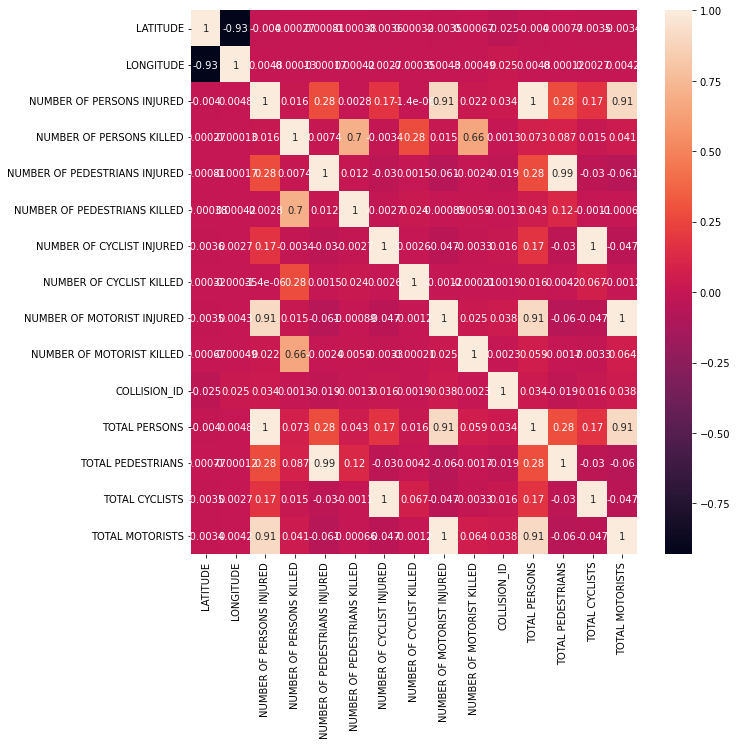

In [ ]:
#Correlation chart
plt.figure(figsize=[10,10])
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [ ]:
df_num

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,TOTAL PERSONS,TOTAL PEDESTRIANS,TOTAL CYCLISTS,TOTAL MOTORISTS
0,NaN,NaN,0.0,0.0,0,0,0,0,0,0,4407480,0.0,0,0,0
1,40.683580,-73.976170,1.0,0.0,1,0,0,0,0,0,4407147,1.0,1,0,0
2,NaN,NaN,0.0,0.0,0,0,0,0,0,0,4407665,0.0,0,0,0
3,NaN,NaN,0.0,0.0,0,0,0,0,0,0,4407811,0.0,0,0,0
4,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,4406885,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848294,40.801235,-73.941815,0.0,0.0,0,0,0,0,0,0,59654,0.0,0,0,0
1848295,40.774711,-73.933386,2.0,0.0,0,0,0,0,2,0,272592,2.0,0,0,2
1848296,40.645032,-73.919978,0.0,0.0,0,0,0,0,0,0,135041,0.0,0,0,0
1848297,40.786122,-73.804078,0.0,0.0,0,0,0,0,0,0,3055617,0.0,0,0,0


In [ ]:
motor_c.isna().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           571200
ZIP CODE                          571422
LATITUDE                          215704
LONGITUDE                         215704
ON STREET NAME                    378234
CROSS STREET NAME                 665839
OFF STREET NAME                  1562434
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       5355
CONTRIBUTING FACTOR VEHICLE 2     268393
CONTRIBUTING FACTOR VEHICLE 3    1721439
CONTRIBUTING FACTOR VEHICLE 4    1820518
CONTRIBUTING FACTOR VEHICLE 5    1840916
COLLISION_ID                           0
VEHICLE TYPE CODE 1                10226
VEHICLE TYPE COD

In [ ]:
motor_c=motor_c.drop(['COLLISION_ID'], axis=1)

In [ ]:
motor_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848299 entries, 0 to 1848298
Data columns (total 33 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   ON STREET NAME                 object 
 7   CROSS STREET NAME              object 
 8   OFF STREET NAME                object 
 9   NUMBER OF PERSONS INJURED      float64
 10  NUMBER OF PERSONS KILLED       float64
 11  NUMBER OF PEDESTRIANS INJURED  int64  
 12  NUMBER OF PEDESTRIANS KILLED   int64  
 13  NUMBER OF CYCLIST INJURED      int64  
 14  NUMBER OF CYCLIST KILLED       int64  
 15  NUMBER OF MOTORIST INJURED     int64  
 16  NUMBER OF MOTORIST KILLED      int64  
 17  CONTRIBUTING FACTOR VEHICLE 1  object 
 18  CO

In [ ]:
motor_c=motor_c.drop(['ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME'], axis=1)

In [ ]:
motor_c.isna().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           571200
ZIP CODE                          571422
LATITUDE                          215704
LONGITUDE                         215704
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       5355
CONTRIBUTING FACTOR VEHICLE 2     268393
CONTRIBUTING FACTOR VEHICLE 3    1721439
CONTRIBUTING FACTOR VEHICLE 4    1820518
CONTRIBUTING FACTOR VEHICLE 5    1840916
VEHICLE TYPE CODE 1                10226
VEHICLE TYPE CODE 2               319582
VEHICLE TYPE CODE 3              1725260
VEHICLE TYPE CODE 4              1821355
VEHICLE TYPE CODE 5              1841118
TOTAL PERSONS   

In [ ]:
motor_c=motor_c.dropna(subset=['BOROUGH'])

In [ ]:
motor_c.isna().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                                0
ZIP CODE                             222
LATITUDE                           33315
LONGITUDE                          33315
NUMBER OF PERSONS INJURED             11
NUMBER OF PERSONS KILLED              23
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       4098
CONTRIBUTING FACTOR VEHICLE 2     196052
CONTRIBUTING FACTOR VEHICLE 3    1201376
CONTRIBUTING FACTOR VEHICLE 4    1259829
CONTRIBUTING FACTOR VEHICLE 5    1272254
VEHICLE TYPE CODE 1                 7627
VEHICLE TYPE CODE 2               230812
VEHICLE TYPE CODE 3              1203462
VEHICLE TYPE CODE 4              1260261
VEHICLE TYPE CODE 5              1272365
TOTAL PERSONS   

In [ ]:
# motor_c.isnull()
motor_c_nonnull = pd.DataFrame()
motor_c_nonnull = motor_c.dropna()

In [ ]:
motor_c_nonnull.isna().sum()

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5              0
TOTAL PERSONS                    0
TOTAL PEDESTRIANS                0
TOTAL CYCLISTS                   0
TOTAL MOTORISTS                  0
CONTRIBUTING FACTOR 

In [ ]:
motor_c_nonnull.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TOTAL PERSONS,TOTAL PEDESTRIANS,TOTAL CYCLISTS,TOTAL MOTORISTS,CONTRIBUTING FACTOR,VEHICLE TYPE
448,04/16/2021,7:30,BROOKLYN,11226,40.638313,-73.95751,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Box Truck,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0,0,0,UnspecifiedUnspecifiedUnspecifiedUnspecifiedUn...,Box TruckSedanStation Wagon/Sport Utility Vehi...
579,04/16/2021,16:28,BROOKLYN,11205,40.694836,-73.96915,0.0,0.0,0,0,0,0,0,0,Alcohol Involvement,Unspecified,Unspecified,Unspecified,Unspecified,Pick-up Truck,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0,0,0,Alcohol InvolvementUnspecifiedUnspecifiedUnspe...,Pick-up TruckStation Wagon/Sport Utility Vehic...
778,04/17/2021,23:40,BROOKLYN,11226,40.648075,-73.95959,1.0,0.0,0,0,0,0,1,0,Alcohol Involvement,Unspecified,Unspecified,Unspecified,Unspecified,Sedan,Sedan,Sedan,Sedan,Sedan,1.0,0,0,1,Alcohol InvolvementUnspecifiedUnspecifiedUnspe...,SedanSedanSedanSedanSedan
851,04/17/2021,3:00,BROOKLYN,11203,40.655754,-73.92403,1.0,0.0,0,0,0,0,1,0,Alcohol Involvement,Unspecified,Unspecified,Unspecified,Unspecified,Sedan,Sedan,Sedan,Sedan,Sedan,1.0,0,0,1,Alcohol InvolvementUnspecifiedUnspecifiedUnspe...,SedanSedanSedanSedanSedan
1129,04/18/2021,8:59,BRONX,10461,40.857014,-73.84307,2.0,0.0,0,0,0,0,2,0,Alcohol Involvement,Unspecified,Unspecified,Unspecified,Unspecified,Sedan,Sedan,Sedan,Sedan,Sedan,2.0,0,0,2,Alcohol InvolvementUnspecifiedUnspecifiedUnspe...,SedanSedanSedanSedanSedan


In [ ]:
featureList = motor_c_nonnull.columns.tolist()

In [ ]:
motor_c_nonnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4574 entries, 448 to 1847347
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     4574 non-null   object 
 1   CRASH TIME                     4574 non-null   object 
 2   BOROUGH                        4574 non-null   object 
 3   ZIP CODE                       4574 non-null   object 
 4   LATITUDE                       4574 non-null   float64
 5   LONGITUDE                      4574 non-null   float64
 6   NUMBER OF PERSONS INJURED      4574 non-null   float64
 7   NUMBER OF PERSONS KILLED       4574 non-null   float64
 8   NUMBER OF PEDESTRIANS INJURED  4574 non-null   int64  
 9   NUMBER OF PEDESTRIANS KILLED   4574 non-null   int64  
 10  NUMBER OF CYCLIST INJURED      4574 non-null   int64  
 11  NUMBER OF CYCLIST KILLED       4574 non-null   int64  
 12  NUMBER OF MOTORIST INJURED     4574 non-nul

Dropping these columns,[6-13], because these values are reflected in the aggregated columns 

In [ ]:
# motor_c_nonnull = motor_c_nonnull.iloc[:,6:14]
featureListKeep = motor_c_nonnull.iloc[:, 6:14].columns.tolist()

In [ ]:
# motor_c_nonnull
# motor_c_nonnull[featureListKeep]
motor_c_nonnull = motor_c_nonnull.drop(columns = featureListKeep)

In [ ]:
motor_c_nonnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4574 entries, 448 to 1847347
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     4574 non-null   object 
 1   CRASH TIME                     4574 non-null   object 
 2   BOROUGH                        4574 non-null   object 
 3   ZIP CODE                       4574 non-null   object 
 4   LATITUDE                       4574 non-null   float64
 5   LONGITUDE                      4574 non-null   float64
 6   CONTRIBUTING FACTOR VEHICLE 1  4574 non-null   object 
 7   CONTRIBUTING FACTOR VEHICLE 2  4574 non-null   object 
 8   CONTRIBUTING FACTOR VEHICLE 3  4574 non-null   object 
 9   CONTRIBUTING FACTOR VEHICLE 4  4574 non-null   object 
 10  CONTRIBUTING FACTOR VEHICLE 5  4574 non-null   object 
 11  VEHICLE TYPE CODE 1            4574 non-null   object 
 12  VEHICLE TYPE CODE 2            4574 non-nul

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encOrd = OrdinalEncoder()
motor_c_nonnull_enc = motor_c_nonnull

featureOrdinal = ['CRASH DATE', 'CRASH TIME','TOTAL PERSONS','TOTAL PEDESTRIANS','TOTAL CYCLISTS','TOTAL MOTORISTS']

for feature in featureOrdinal:
  tmpEnc = motor_c_nonnull[feature]
  tmpEnc = tmpEnc.to_numpy()
  motor_c_nonnull_enc[feature] = encOrd.fit_transform(tmpEnc.reshape((-1,1)))

motor_c_nonnull_enc


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TOTAL PERSONS,TOTAL PEDESTRIANS,TOTAL CYCLISTS,TOTAL MOTORISTS,CONTRIBUTING FACTOR,VEHICLE TYPE
448,644.0,936.0,BROOKLYN,11226,40.638313,-73.957510,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Box Truck,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0.0,0.0,0.0,UnspecifiedUnspecifiedUnspecifiedUnspecifiedUn...,Box TruckSedanStation Wagon/Sport Utility Vehi...
579,644.0,310.0,BROOKLYN,11205,40.694836,-73.969150,Alcohol Involvement,Unspecified,Unspecified,Unspecified,Unspecified,Pick-up Truck,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0.0,0.0,0.0,Alcohol InvolvementUnspecifiedUnspecifiedUnspe...,Pick-up TruckStation Wagon/Sport Utility Vehic...
778,647.0,671.0,BROOKLYN,11226,40.648075,-73.959590,Alcohol Involvement,Unspecified,Unspecified,Unspecified,Unspecified,Sedan,Sedan,Sedan,Sedan,Sedan,1.0,0.0,0.0,1.0,Alcohol InvolvementUnspecifiedUnspecifiedUnspe...,SedanSedanSedanSedanSedan
851,647.0,735.0,BROOKLYN,11203,40.655754,-73.924030,Alcohol Involvement,Unspecified,Unspecified,Unspecified,Unspecified,Sedan,Sedan,Sedan,Sedan,Sedan,1.0,0.0,0.0,1.0,Alcohol InvolvementUnspecifiedUnspecifiedUnspe...,SedanSedanSedanSedanSedan
1129,655.0,985.0,BRONX,10461,40.857014,-73.843070,Alcohol Involvement,Unspecified,Unspecified,Unspecified,Unspecified,Sedan,Sedan,Sedan,Sedan,Sedan,2.0,0.0,0.0,2.0,Alcohol InvolvementUnspecifiedUnspecifiedUnspe...,SedanSedanSedanSedanSedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846225,1155.0,922.0,STATEN ISLAND,10310,40.634300,-74.120240,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,0.0,0.0,0.0,0.0,UnspecifiedUnspecifiedUnspecifiedUnspecifiedUn...,PASSENGER VEHICLEPASSENGER VEHICLEPASSENGER VE...
1846801,1140.0,854.0,MANHATTAN,10030,40.815206,-73.947490,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,1.0,0.0,0.0,1.0,UnspecifiedUnspecifiedUnspecifiedUnspecifiedUn...,PASSENGER VEHICLEPASSENGER VEHICLEPASSENGER VE...
1847235,1164.0,400.0,BROOKLYN,11234,40.634483,-73.918852,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,Backing Unsafely,Unspecified,Unspecified,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,1.0,0.0,0.0,1.0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,PASSENGER VEHICLEPASSENGER VEHICLEPASSENGER VE...
1847341,1155.0,391.0,QUEENS,11434,40.679653,-73.777229,Driver Inexperience,Unspecified,Unspecified,Unspecified,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,0.0,0.0,0.0,0.0,Driver InexperienceUnspecifiedUnspecifiedUnspe...,PASSENGER VEHICLEPASSENGER VEHICLEPASSENGER VE...


In [ ]:
motor_c_nonnull_enc.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
       'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'TOTAL PERSONS',
       'TOTAL PEDESTRIANS', 'TOTAL CYCLISTS', 'TOTAL MOTORISTS',
       'CONTRIBUTING FACTOR', 'VEHICLE TYPE'],
      dtype='object')

In [ ]:
motor_c_nonnull_enc

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TOTAL PERSONS,TOTAL PEDESTRIANS,TOTAL CYCLISTS,TOTAL MOTORISTS,CONTRIBUTING FACTOR,VEHICLE TYPE
448,644.0,936.0,BROOKLYN,11226,40.638313,-73.957510,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Box Truck,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0.0,0.0,0.0,UnspecifiedUnspecifiedUnspecifiedUnspecifiedUn...,Box TruckSedanStation Wagon/Sport Utility Vehi...
579,644.0,310.0,BROOKLYN,11205,40.694836,-73.969150,Alcohol Involvement,Unspecified,Unspecified,Unspecified,Unspecified,Pick-up Truck,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0.0,0.0,0.0,Alcohol InvolvementUnspecifiedUnspecifiedUnspe...,Pick-up TruckStation Wagon/Sport Utility Vehic...
778,647.0,671.0,BROOKLYN,11226,40.648075,-73.959590,Alcohol Involvement,Unspecified,Unspecified,Unspecified,Unspecified,Sedan,Sedan,Sedan,Sedan,Sedan,1.0,0.0,0.0,1.0,Alcohol InvolvementUnspecifiedUnspecifiedUnspe...,SedanSedanSedanSedanSedan
851,647.0,735.0,BROOKLYN,11203,40.655754,-73.924030,Alcohol Involvement,Unspecified,Unspecified,Unspecified,Unspecified,Sedan,Sedan,Sedan,Sedan,Sedan,1.0,0.0,0.0,1.0,Alcohol InvolvementUnspecifiedUnspecifiedUnspe...,SedanSedanSedanSedanSedan
1129,655.0,985.0,BRONX,10461,40.857014,-73.843070,Alcohol Involvement,Unspecified,Unspecified,Unspecified,Unspecified,Sedan,Sedan,Sedan,Sedan,Sedan,2.0,0.0,0.0,2.0,Alcohol InvolvementUnspecifiedUnspecifiedUnspe...,SedanSedanSedanSedanSedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846225,1155.0,922.0,STATEN ISLAND,10310,40.634300,-74.120240,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,0.0,0.0,0.0,0.0,UnspecifiedUnspecifiedUnspecifiedUnspecifiedUn...,PASSENGER VEHICLEPASSENGER VEHICLEPASSENGER VE...
1846801,1140.0,854.0,MANHATTAN,10030,40.815206,-73.947490,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,1.0,0.0,0.0,1.0,UnspecifiedUnspecifiedUnspecifiedUnspecifiedUn...,PASSENGER VEHICLEPASSENGER VEHICLEPASSENGER VE...
1847235,1164.0,400.0,BROOKLYN,11234,40.634483,-73.918852,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,Backing Unsafely,Unspecified,Unspecified,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,1.0,0.0,0.0,1.0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,PASSENGER VEHICLEPASSENGER VEHICLEPASSENGER VE...
1847341,1155.0,391.0,QUEENS,11434,40.679653,-73.777229,Driver Inexperience,Unspecified,Unspecified,Unspecified,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,0.0,0.0,0.0,0.0,Driver InexperienceUnspecifiedUnspecifiedUnspe...,PASSENGER VEHICLEPASSENGER VEHICLEPASSENGER VE...


In [ ]:
featureListRest = ['BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
       'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'CONTRIBUTING FACTOR', 'VEHICLE TYPE']

In [ ]:
for feature in featureListRest:
    tmpEnc = pd.get_dummies(motor_c_nonnull_enc[feature], prefix=feature)

    motor_c_nonnull_enc = pd.merge(
        left=motor_c_nonnull_enc,
        right=tmpEnc,
        left_index=True,
        right_index=True,
    )
    motor_c_nonnull_enc = motor_c_nonnull_enc.drop(columns=feature)

# motor_c_nonnull_enc

# for feature in featureListRest:
#   tmpEnc = motor_c_nonnull_enc[feature]
#   tmpEnc = tmpEnc.to_numpy()
#   motor_c_nonnull_enc[feature] = encOrd.fit_transform(tmpEnc.reshape((-1,1)))



In [ ]:
motor_c_nonnull_enc

,CRASH DATE,CRASH TIME,TOTAL PERSONS,TOTAL PEDESTRIANS,TOTAL CYCLISTS,TOTAL MOTORISTS,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND,ZIP CODE_10001.0,ZIP CODE_10002.0,ZIP CODE_10003.0,ZIP CODE_10004.0,ZIP CODE_10005.0,ZIP CODE_10006.0,ZIP CODE_10007.0,ZIP CODE_10009.0,ZIP CODE_10010.0,ZIP CODE_10011.0,ZIP CODE_10012.0,ZIP CODE_10013.0,ZIP CODE_10014.0,ZIP CODE_10016.0,ZIP CODE_10017.0,ZIP CODE_10018.0,ZIP CODE_10019.0,ZIP CODE_10020.0,ZIP CODE_10021.0,ZIP CODE_10022.0,ZIP CODE_10023.0,ZIP CODE_10024.0,ZIP CODE_10025.0,ZIP CODE_10026.0,ZIP CODE_10027.0,ZIP CODE_10028.0,ZIP CODE_10029.0,ZIP CODE_10030.0,ZIP CODE_10031.0,...,VEHICLE TYPE_VANPASSENGER VEHICLESPORT UTILITY / STATION WAGONSPORT UTILITY / STATION WAGONSPORT UTILITY / STATION WAGON,VEHICLE TYPE_VANPASSENGER VEHICLESPORT UTILITY / STATION WAGONVANPASSENGER VEHICLE,VEHICLE TYPE_VANPASSENGER VEHICLETAXIPASSENGER VEHICLESPORT UTILITY / STATION WAGON,VEHICLE TYPE_VANPASSENGER VEHICLETAXIPASSENGER VEHICLEVAN,VEHICLE TYPE_VANPASSENGER VEHICLEVANSPORT UTILITY / STATION WAGONSPORT UTILITY / STATION WAGON,VEHICLE TYPE_VANSPORT UTILITY / STATION WAGONOTHEROTHERPASSENGER VEHICLE,VEHICLE TYPE_VANSPORT UTILITY / STATION WAGONPASSENGER VEHICLEPASSENGER VEHICLEPASSENGER VEHICLE,VEHICLE TYPE_VANSPORT UTILITY / STATION WAGONPASSENGER VEHICLEPASSENGER VEHICLESPORT UTILITY / STATION WAGON,VEHICLE TYPE_VANSPORT UTILITY / STATION WAGONPASSENGER VEHICLEPASSENGER VEHICLEVAN,VEHICLE TYPE_VANSPORT UTILITY / STATION WAGONPASSENGER VEHICLESPORT UTILITY / STATION WAGONSPORT UTILITY / STATION WAGON,VEHICLE TYPE_VANSPORT UTILITY / STATION WAGONSPORT UTILITY / STATION WAGONPASSENGER VEHICLEPASSENGER VEHICLE,VEHICLE TYPE_VANSPORT UTILITY / STATION WAGONSPORT UTILITY / STATION WAGONPASSENGER VEHICLESPORT UTILITY / STATION WAGON,VEHICLE TYPE_VANSPORT UTILITY / STATION WAGONSPORT UTILITY / STATION WAGONSPORT UTILITY / STATION WAGONPASSENGER VEHICLE,VEHICLE TYPE_VANSPORT UTILITY / STATION WAGONSPORT UTILITY / STATION WAGONSPORT UTILITY / STATION WAGONSPORT UTILITY / STATION WAGON,VEHICLE TYPE_VANTAXIOTHERSPORT UTILITY / STATION WAGONVAN,VEHICLE TYPE_VANUNKNOWNPASSENGER VEHICLESPORT UTILITY / STATION WAGONPASSENGER VEHICLE,VEHICLE TYPE_VANVANPASSENGER VEHICLEPASSENGER VEHICLEPASSENGER VEHICLE,VEHICLE TYPE_VANVANPASSENGER VEHICLESPORT UTILITY / STATION WAGONPASSENGER VEHICLE,VEHICLE TYPE_VANVANPASSENGER VEHICLESPORT UTILITY / STATION WAGONSPORT UTILITY / STATION WAGON,VEHICLE TYPE_VANVANSPORT UTILITY / STATION WAGONSPORT UTILITY / STATION WAGONSPORT UTILITY / STATION WAGON,VEHICLE TYPE_VANVANVANPASSENGER VEHICLEPASSENGER VEHICLE,VEHICLE TYPE_VanSedanSedanSedanSedan,VEHICLE TYPE_VanSedanSedanSedanStation Wagon/Sport Utility Vehicle,VEHICLE TYPE_VanSedanSedanStation Wagon/Sport Utility VehicleSedan,VEHICLE TYPE_VanSedanSedanStation Wagon/Sport Utility VehicleStation Wagon/Sport Utility Vehicle,VEHICLE TYPE_VanSedanStation Wagon/Sport Utility VehicleBox TruckSedan,VEHICLE TYPE_VanSedanStation Wagon/Sport Utility VehicleSedanSedan,VEHICLE TYPE_VanSedanStation Wagon/Sport Utility VehicleSedanStation Wagon/Sport Utility Vehicle,VEHICLE TYPE_VanSedanStation Wagon/Sport Utility VehicleStation Wagon/Sport Utility VehicleSedan,VEHICLE TYPE_VanSedanStation Wagon/Sport Utility VehicleStation Wagon/Sport Utility VehicleStation Wagon/Sport Utility Vehicle,VEHICLE TYPE_VanStation Wagon/Sport Utility Vehicle4 dr sedanVanVan,VEHICLE TYPE_VanStation Wagon/Sport Utility VehicleSedanSedanMoped,VEHICLE TYPE_VanStation Wagon/Sport Utility VehicleSedanSedanSedan,VEHICLE TYPE_VanStation Wagon/Sport Utility VehicleSedanStation Wagon/Sport Utility VehicleSedan,VEHICLE TYPE_VanTractor Truck DieselSedanTaxiSedan,VEHICLE TYPE_Work vanSedanStation Wagon/Sport Utility VehicleStation Wagon/Sport Utility VehicleSedan,VEHICLE TYPE_busStation Wagon/Sport Utility VehicleSedanSedanSedan,VEHICLE TYPE_fire truckSubnSedanSedanSedan,VEHICLE TYPE_vanBikeSedanSedanSedan,VEHICLE TYPE_vanStation Wagon/Sport Util

In [ ]:
import sklearn as skl
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_start = 2
k_end = 5
k_vals = range(k_start,k_end)

X_features = motor_c_nonnull_enc

y_Array = []
scores = []

for k in k_vals:
  tmpKM = KMeans(n_clusters=k).fit(X_features)
  tmpKM_vals = tmpKM.predict(X_features)
  ctds = tmpKM.labels_
  y_Array.append(tmpKM_vals)
  score = silhouette_score(X_features, ctds, metric='euclidean')
  scores.append(score)

Text(0, 0.5, 'Silhoutte Score')

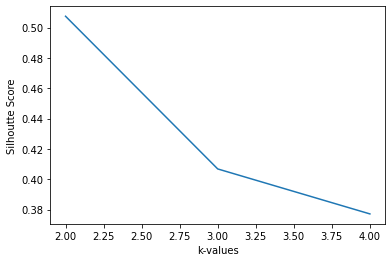

In [ ]:
plt_x = range(k_start, k_end)

plt.plot(plt_x,scores)

plt.xlabel("k-values")
plt.ylabel("Silhoutte Score")